# Project 4: Kaggle Competition: West Nile Virus Prediction
### Notebook 02a: Data collection and EDA (train, test datasets)

# Problem Statement

West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death. 

In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today. 

Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

There is a great deal of variation in outbreaks of West Nile Virus (WNV) intensity and duration year to year, which makes prediction of outberak and effort to contain the spread of WNV difficult.

Given weather, location, testing, and spraying data, the goal of this project is to build a **classification model** to predict outbreaks of WNV in mosquitos. This will help the City of Chicago and CDPH more efficiently and effectively allocate resourses towards preventing transmission of this potentially deadly virus.

## 1. 0 Load and Importing Datasets

### Import required libraries

In [13]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

%matplotlib inline

#To visualize the whole grid
pd.options.display.max_columns = 999

In [14]:
# read csv directly from github for train.csv

url_train = 'https://raw.git.generalassemb.ly/joeychewkw/DSI13-P4-G6/master/assets/west_nile/input/train.csv?token=AAAGL6CYO6P352ZR5ZTMNPS6PV6MM'

train = pd.read_csv(url_train, error_bad_lines=False)

In [15]:
# read csv directly from github for test.csv

url_test = 'https://raw.git.generalassemb.ly/joeychewkw/DSI13-P4-G6/master/assets/west_nile/input/test.csv?token=AAAGL6DRM2JGHS7CAGDT3FC6PV6WY'

test = pd.read_csv(url_test, error_bad_lines=False)

## 2.0 Data Cleaning and Data Exploratory Analysis (EDA)

### 2.1 Train/ Test data
- The train dataset consist of **12** columns and **10506** rows, with 6 'str' data type and 6 numeric data type.
- `WnvPresent` is the y-target (binary). 1: West Nile Virus(WNV) is PRESENT, 0: WNV not present
- The test dataset is without the target column, i.e. `WnvPresent`, and predictor `NumMosquitos`. It has **116293** rows
- The `.info()` shows NO missing values for both train and test datasets.


In [16]:
### Quick look of the first 5 rows of data
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


**Data dictionary**

|Feature|Type|Description|
|---|---|---|
|**Date**|*str*|Date that the WNV test is performed| 
|**Address**|*str*|Approximate address of the location of trap. This is used to send to the GeoCoder| 
|**Species**|*str*|The species of mosquitos| 
|**Block**|*int*|Block number of address| 
|**Street**|*str*|Street name| 
|**Trap**|*str*|Id of the trap| 
|**AddressNumberAndStreet**|*str*|Approximate address returned from GeoCoder| 
|**Latitude**|*float*|Latitude returned from GeoCoder| 
|**Longitude**|*float*|Longitude returned from GeoCoder| 
|**AddressAccuracy**|*int*|Accuracy returned from GeoCoder| 
|**NumMosquitos**|*int*|Number of mosquitoes caught in this trap| 
|**WnvPresent**|*int*|Whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present| 

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


### Date in 'str' data type
- Convert `str` to `datetime` datatype for 'Date'

In [19]:
train['Date'] = train['Date'].apply(lambda x : pd.datetime.strptime(x, '%Y-%m-%d'))
test['Date'] = test['Date'].apply(lambda x : pd.datetime.strptime(x, '%Y-%m-%d'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


### Basic statistic of numeric data
- No abnormal data point observed
- `WnvPresent` is having unbalance class with majority 'zero' value.

In [20]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [21]:
test.describe()

,Id,Block,Latitude,Longitude,AddressAccuracy
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.131100,41.849389,-87.693658,7.954357
std,33571.041765,24.864726,0.106593,0.080699,1.252733
min,1.000000,10.000000,41.644612,-87.930995,3.000000
25%,29074.000000,18.000000,41.753411,-87.750938,8.000000
50%,58147.000000,39.000000,41.862292,-87.694991,8.000000
75%,87220.000000,61.000000,41.951866,-87.648860,9.000000
max,116293.000000,98.000000,42.017430,-87.531635,9.000000


### y-target: WnvPresent (1 : West Nile Virus is present)
- As observed in the basic descriptive statistic above, `WnvPresent` is having imbalance class.
- Only **5%** (551 out of 10506) of the data is with WNV Present (i.e. `1`).

In [22]:
### Imbalance classs, where only 5% of data is with West Nile Virus is present
train['WnvPresent'].value_counts(normalize = True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

0    9955
1     551
Name: WnvPresent, dtype: int64

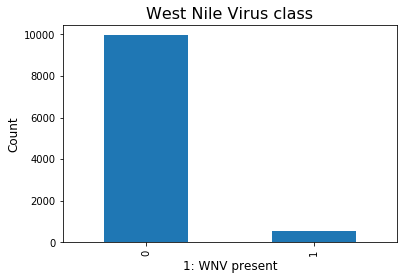

In [23]:
### Barplot of 'WnvPresent'

plt.subplots(figsize=(6,4));
train['WnvPresent'].value_counts().plot(kind = 'bar');
plt.title('West Nile Virus class', fontsize = 16);
plt.xlabel('1: WNV present', fontsize = 12);
plt.ylabel('Count', fontsize = 12);
train['WnvPresent'].value_counts()

### Number of Mosquitos

- `WnvPresent` class `1`, i.e. WNV present, median number of mosquitos is much higher than for class `0`, which indicates more mosquitos increase the chances of WNV present/ infected.
- However, there are quite a number of outliers (number of mosquitos > 30) observed in class `0`.
- Asides, class `1` is covering the entire range of mosquito count (i.e. 1 to 50), which indicate that `NumMosquitos` is vague predictor.
- In addition, this predictor is part of the mosquitos test results, which include number of mosquitos, the mosquitos species, and whether or not WNV is present(i.e. y-predict) in the cohort.
- It was observed that, this feature is NOT exist in test dataset.

In [24]:
### Define boxplot funciton:
def plot_boxplot(df,y,x,hue,title,xlabel,ylabel):
    sns.set(style="darkgrid")
    plt.subplots(figsize=(12,8));
    
    sns.boxplot(y = y, x = x, 
            data = df, hue = hue,
            palette = 'colorblind');
    
    plt.xlabel(xlabel, fontsize = 14);
    plt.xticks(rotation=60, fontsize =14);
    plt.ylabel(ylabel, fontsize = 14);
    plt.title(title, fontsize = 18);
    plt.legend(loc='upper right', fontsize =12)
  

In [25]:
### Define barplot function
def plot_barplot(df,y,x,hue,title,xlabel,ylabel):
    
    sns.set(style="darkgrid")
    plt.subplots(figsize=(12,6));

    sns.barplot(x = x, y= y, data=df, hue= hue);  

    plt.title(title, fontsize = 18);
    plt.xlabel(xlabel, fontsize = 14);
    plt.xticks(rotation=60, fontsize =14);
    plt.ylabel(ylabel, fontsize = 14);
    plt.legend(loc='upper right', fontsize =12)


In [26]:
### Define countplot function
def plot_countplot(df,x,hue,title,xlabel):
    
    sns.set(style="darkgrid")

    plt.subplots(figsize=(12,6));

    sns.countplot(x=x, data=df, hue=hue);
    plt.title(title, fontsize = 18);
    plt.xlabel(xlabel, fontsize = 14);
    plt.xticks(rotation=60, fontsize =14);
    plt.ylabel("Trap's Count", fontsize = 14);


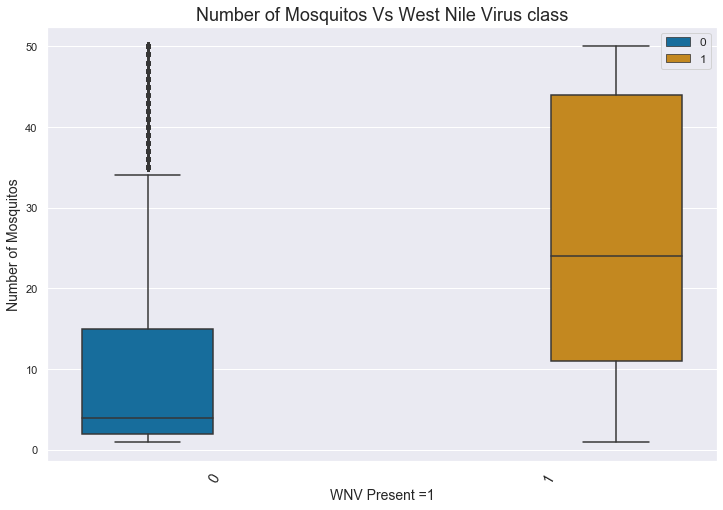

In [27]:
## Number of mosquitos
plot_boxplot(train,'NumMosquitos','WnvPresent','WnvPresent',
             'Number of Mosquitos Vs West Nile Virus class','WNV Present =1','Number of Mosquitos')

### Observation
- `NumMosquitos` is capped at 50. Once it reaches 50, it will split and record in another row. Thus, it is NOT the total number of mosquitos present at a particular trap, if the numbers exceeds 50. (e.g. trap 115 in below cell)
- In addition, the count split among species too, that is, with the same trap (or location), the record is split among species as well. (e.g. trap T114 in below cell)

In [28]:
### Number of Mosquitos below 10 or equal to 50
train[~train['NumMosquitos'].between(10,49)].drop(
    ['Address','Street','Block','Latitude', 'Longitude'], axis =1).iloc[2498:2528,:]

,Date,Species,Trap,AddressNumberAndStreet,AddressAccuracy,NumMosquitos,WnvPresent
3153,2007-09-12,CULEX TERRITANS,T081,"4000 S DEARBORN ST, Chicago, IL",9,1,0
3154,2007-09-12,CULEX PIPIENS/RESTUANS,T082,"5000 S UNION AVE, Chicago, IL",8,1,0
3155,2007-09-12,CULEX PIPIENS/RESTUANS,T114,"5200 S KOLMAR, Chicago, IL",8,9,1
3156,2007-09-12,CULEX PIPIENS,T114,"5200 S KOLMAR, Chicago, IL",8,5,0
3159,2007-09-12,CULEX PIPIENS,T063,"3700 S PULASKI RD, Chicago, IL",9,6,0
3160,2007-09-12,CULEX PIPIENS,T115,"1200 S DOTY AVE, Chicago, IL",5,50,0
3161,2007-09-12,CULEX PIPIENS,T115,"1200 S DOTY AVE, Chicago, IL",5,50,0
3162,2007-09-12,CULEX PIPIENS,T115,"1200 S DOTY AVE, Chicago, IL",5,50,0
3163,2007-09-12,CULEX PIPIENS,T115,"1200 S DOTY AVE, Chicago, IL",5,50,0
3165,2007-09-12,CULEX PIPIENS/RESTUANS,T138,"1000 S STONY ISLAND AVE, Chicago, IL",5,3,0


### The species of mosquitos

- While over 150 species of mosquitoes have been known to carry the virus, the main vector species in the U.S. are Culex pipiens, Culex tarsalis, and Culex quinquefasciatus. [Source](http://www.vdci.net/vector-borne-diseases/west-nile-virus-education-and-mosquito-management-to-protect-public-health)
- Species detected in train dataset are: 'CULEX ERRATICUS','CULEX PIPIENS','CULEX PIPIENS/RESTUANS','CULEX RESTUANS','CULEX SALINARIUS','CULEX TARSALIS',and 'CULEX TERRITANS'
- Additional one species' group is observed in test dataset, i.e. 'UNSPECIFIED CULEX'
- Among the 7 groups of species detected in train dataset, 'CULEX PIPIENS','CULEX PIPIENS/RESTUANS','CULEX RESTUANS' are with **WNV present**


In [29]:
### What species have been detected in train dataset:
print(set(train.Species))
print(f'Number of species detected: {len(set(train.Species))}')

{'CULEX ERRATICUS', 'CULEX RESTUANS', 'CULEX PIPIENS/RESTUANS', 'CULEX TARSALIS', 'CULEX PIPIENS', 'CULEX TERRITANS', 'CULEX SALINARIUS'}
Number of species detected: 7


In [30]:
### What species have been detected in test dataset:
print(set(test.Species))
print(f'Number of species detected: {len(set(test.Species))}')

{'CULEX ERRATICUS', 'UNSPECIFIED CULEX', 'CULEX RESTUANS', 'CULEX PIPIENS/RESTUANS', 'CULEX TARSALIS', 'CULEX PIPIENS', 'CULEX TERRITANS', 'CULEX SALINARIUS'}
Number of species detected: 8


In [31]:
### Among the 7 species, which species is with WNV present?

train.groupby('Species').sum().WnvPresent

Species
CULEX ERRATICUS             0
CULEX PIPIENS             240
CULEX PIPIENS/RESTUANS    262
CULEX RESTUANS             49
CULEX SALINARIUS            0
CULEX TARSALIS              0
CULEX TERRITANS             0
Name: WnvPresent, dtype: int64

### Species distribution plot 
- Only TWO species found to have WNV infection, they are Culex Pipiens and Culex Restuans. The number of WNV infection per species's group is listed in above cell.
- “Culex Pipiens” has the highest relative portion of WNV infection rate, that is 8.9% (240/2699).
- Observed trend: WNV infection detected has higher median of number of mosquitos compared to WNV not infected (shown in box plot below).

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

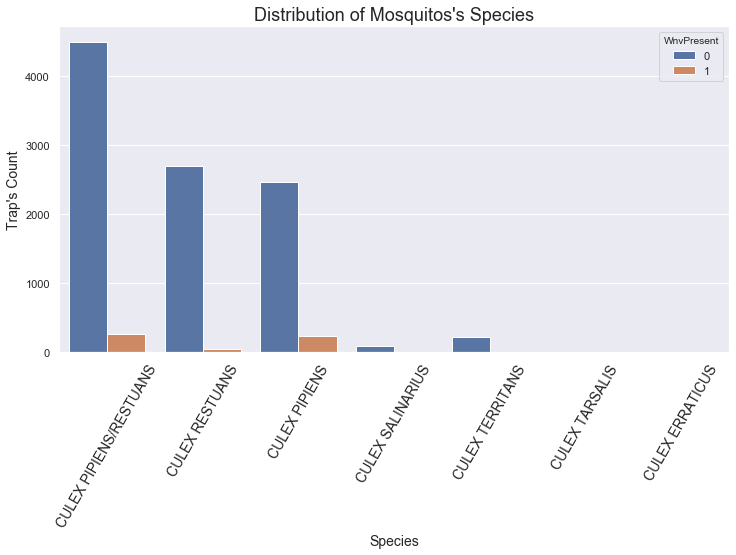

In [32]:
plot_countplot(train,'Species','WnvPresent',"Distribution of Mosquitos's Species",'Species')
train['Species'].value_counts()

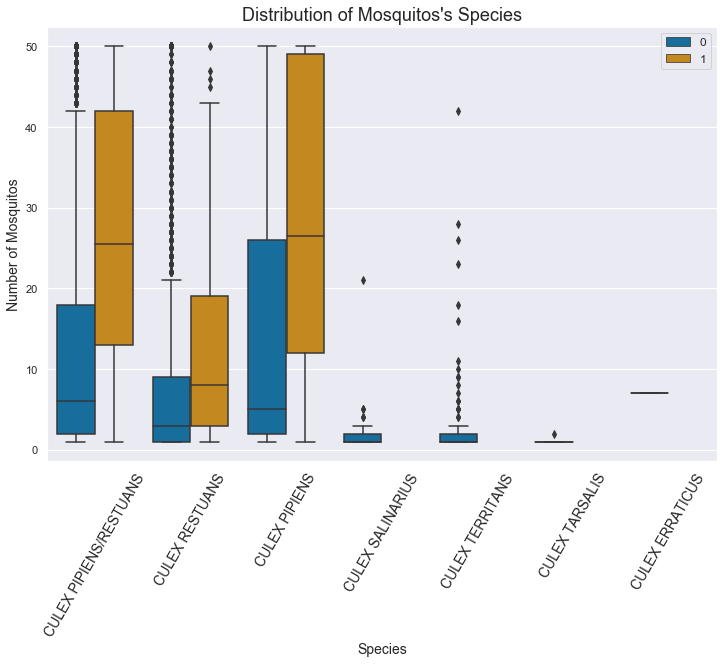

In [33]:
plot_boxplot(train,'NumMosquitos','Species','WnvPresent',
             "Distribution of Mosquitos's Species",'Species','Number of Mosquitos')

### Date/ timeline predictor

In [34]:
### Function to parse date predictor
year_func = lambda x: x.year
month_func = lambda x: x.month
day_func= lambda x: x.day
day_of_year_func = lambda x: x.dayofyear
week_of_year_func = lambda x: x.week

In [35]:
### Train dataset
train['year'] = train.Date.apply(year_func)
train['month'] = train.Date.apply(month_func)
train['day'] = train.Date.apply(day_func)
train['day_of_year'] = train.Date.apply(day_of_year_func)
train['week'] = train.Date.apply(week_of_year_func)

In [36]:
### Test dataset
test['year'] = test.Date.apply(year_func)
test['month'] = test.Date.apply(month_func)
test['day'] = test.Date.apply(day_func)
test['day_of_year'] = test.Date.apply(day_of_year_func)
test['week'] = test.Date.apply(week_of_year_func)

### Number of Mosquitos distribution in timeline

- Number of mosquitos varies between years, with highest in year 2007, and substantial drop in year 2009, but increasing in year 2011 & 2013.
- Number of mosquitos peaks from June and July, heading towards downward trend till Oct.

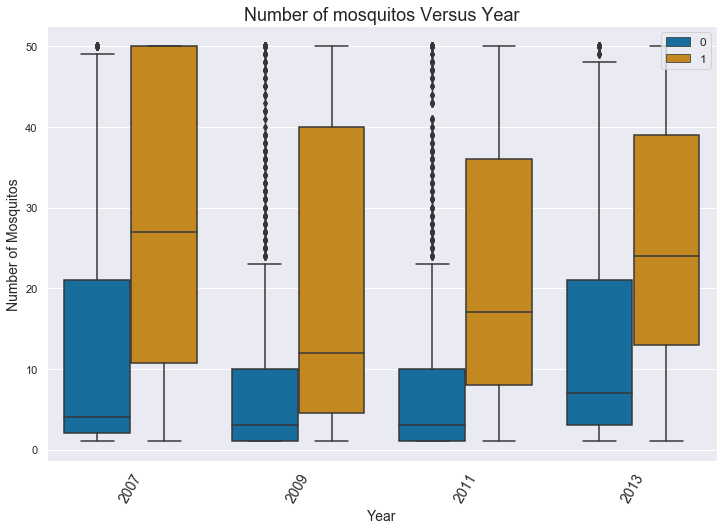

In [37]:
plot_boxplot(train,'NumMosquitos','year','WnvPresent',
             'Number of mosquitos Versus Year','Year','Number of Mosquitos')


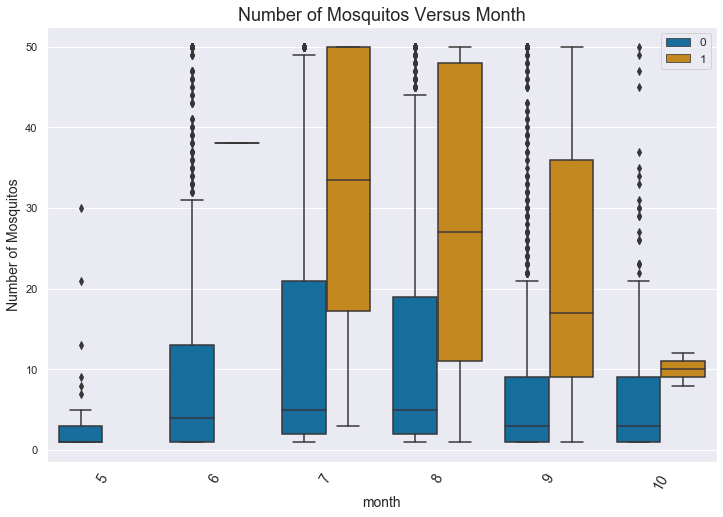

In [38]:
plot_boxplot(train,'NumMosquitos','month','WnvPresent',
             'Number of Mosquitos Versus Month','month','Number of Mosquitos')

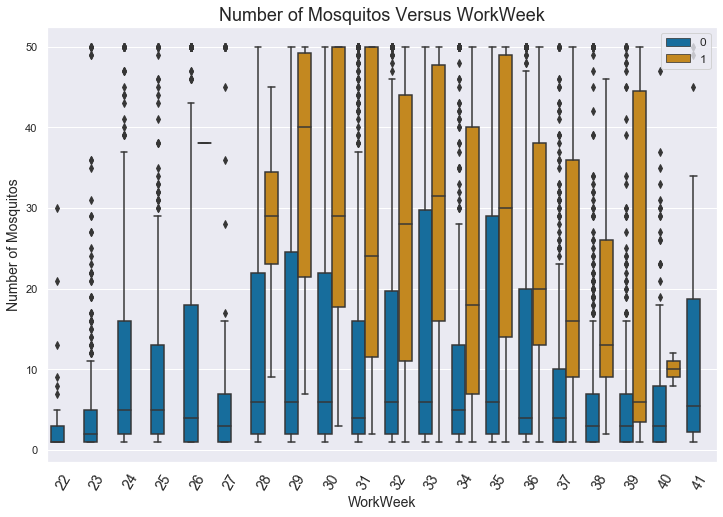

In [39]:
plot_boxplot(train,'NumMosquitos','week','WnvPresent',
             'Number of Mosquitos Versus WorkWeek','WorkWeek','Number of Mosquitos')

### Number of WNV infected (i.e. WnvPresent class: 1) in timeline

- Similarly, the WNV infected varies between years, with more in year 2007 and 2013.
- It follows the number of mosquitos trend, but laging roughly a month, that is, it peaks at Auguest.

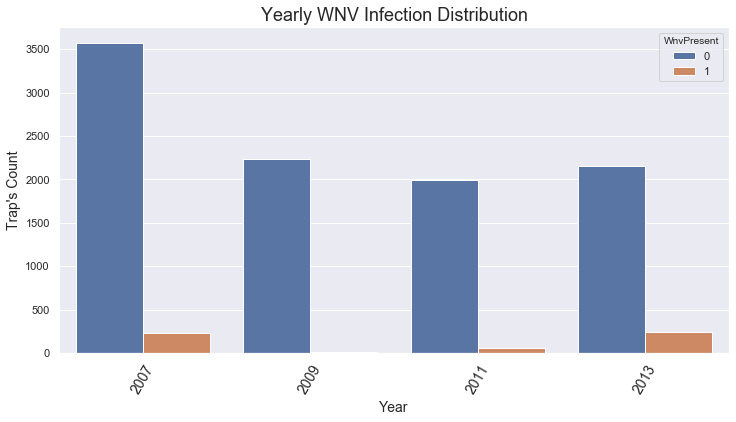

In [40]:
plot_countplot(train,'year','WnvPresent',
               'Yearly WNV Infection Distribution','Year')

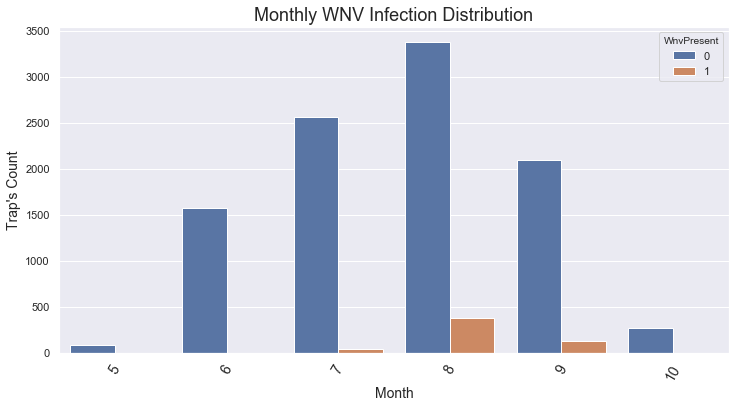

In [41]:
plot_countplot(train,'month','WnvPresent',
               'Monthly WNV Infection Distribution','Month')

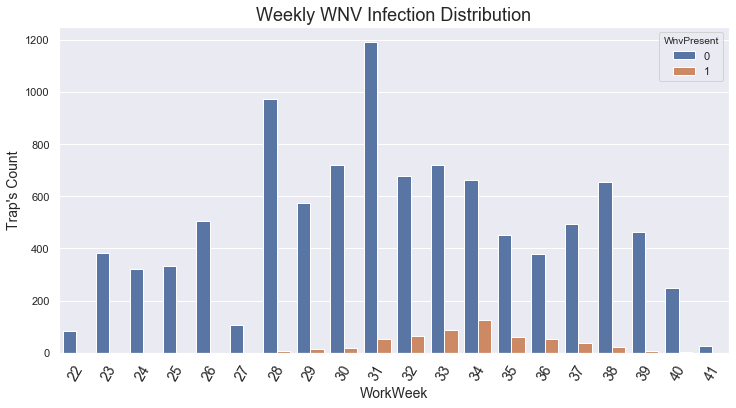

In [42]:
plot_countplot(train,'week','WnvPresent',
               'Weekly WNV Infection Distribution','WorkWeek')

### Number of WNV infected in timeline, categorized by species

- Culex Pipiens/Restuans are the majority species found in the trap, and it is also the majority species infected with WNV (i.e. =1). 
- Year 2007 and 2013 have more WNV infected cases (i.e. =1). Among them, **Culex Pipiens** appeared to be the majority species.
- Count of Culex Restuans detected in trap increasing by year. But, it has relatively lower share among the species found with WNV infection.

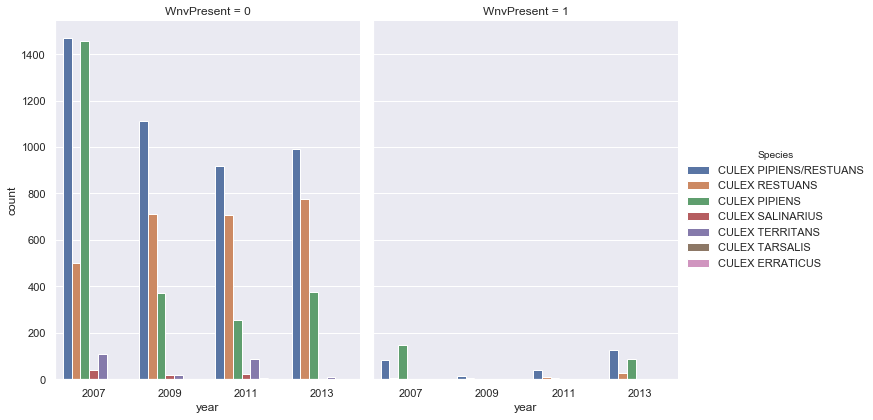

In [43]:
### Year
sns.set(style="darkgrid")

sns.catplot(x="year", hue="Species", col="WnvPresent",
                data=train, kind="count",
                height=6, aspect=.8);

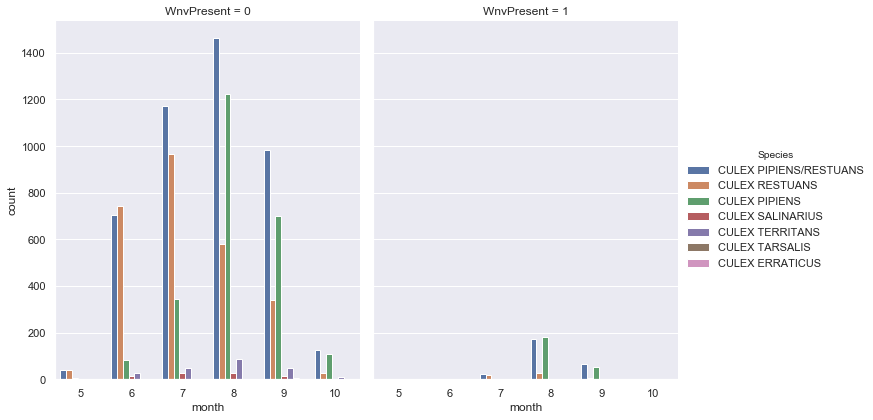

In [44]:
### Month
sns.set(style="darkgrid")

sns.catplot(x="month", hue="Species", col="WnvPresent",
                data=train, kind="count",
                height=6, aspect=.8);

### Location of Traps in Longitude and Latitude

- The location of traps are described by the block number and street name (columns: `Block`, `Street`). Kaggle dataset have mapped these attributes into Longitude and Latitude in the dataset. These are derived locations, but it will be a better option to use it for modeling. 

- Column `Address` is the approximate address send to GeoCoder. Column `AddressNumberAndStreet` is this approximated address returned form GeoCoder. Column `AddressAccuracy`, which is the accuracy returned from GeoCoder.

- These are all columns describing the SAME thing, that is the location of trap. Thus, will only use `Longitude` and `Latitude` as location predictor (feature) for modeling, and drop the rest. 

- Plot below shows that Year **2007** and year **2013** are having higher number of WNV infection.
- Both years also observed the WNV infection started in the southen region of Chicago in July and June, and spread towards northen Chicago, with peaks obsserved in August.


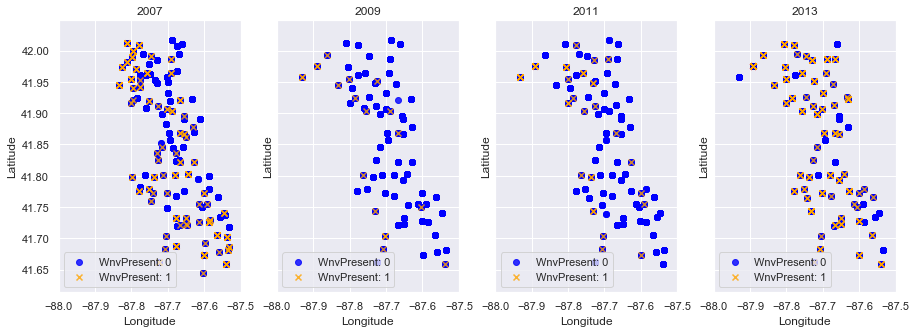

In [45]:
### Year 

years = sorted(list(set(train.year)))

fig,ax = plt.subplots(nrows=1,ncols=4, sharey=True)
fig.set_size_inches(15, 5)

i=0
for yr in years:
    
    no_wnv = train[(train['year'] == yr) & (train['WnvPresent'] == 0) ]
    yes_wnv = train[(train['year'] == yr) & (train['WnvPresent'] == 1) ]
    
    sns.regplot('Longitude', 'Latitude', data = no_wnv, fit_reg = False, ax = ax[i], color = 'blue', 
                label = 'WnvPresent: 0')
    sns.regplot('Longitude', 'Latitude', data = yes_wnv, fit_reg = False, 
                ax = ax[i], color = 'orange', marker = 'x', label='WnvPresent: 1')
    ax[i].set_title(yr)
    ax[i].set_xlim([-88, -87.5])
    ax[i].legend()
    
    i +=1

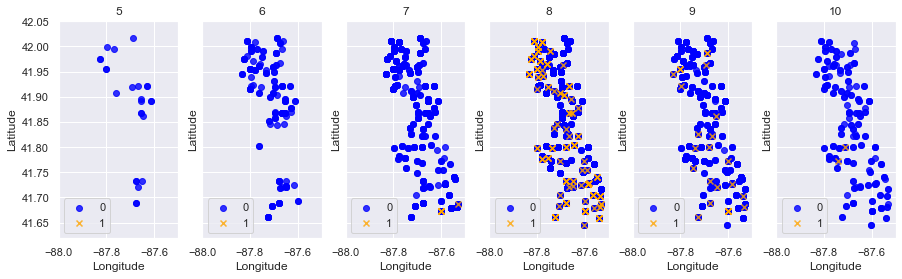

In [46]:
### By month, year 2007

months = sorted(list(set(train.month)))
fig,ax = plt.subplots(nrows=1,ncols=6, sharey=True)
fig.set_size_inches(15, 4)

i=0
for mth in months:
    
    no_wnv = train[(train['year'] == 2007) & (train['WnvPresent'] == 0) & (train['month'] == mth) ]
    yes_wnv = train[(train['year'] == 2007) & (train['WnvPresent'] == 1) & (train['month'] == mth) ]
    
    sns.regplot('Longitude', 'Latitude', data = no_wnv, fit_reg = False, ax = ax[i], color = 'blue', 
                label = '0')
    sns.regplot('Longitude', 'Latitude', data = yes_wnv, fit_reg = False, 
                ax = ax[i], color = 'orange', marker = 'x', label='1')
    ax[i].set_title(mth)
    ax[i].set_xlim([-88, -87.5])
    ax[i].legend()
    
    i +=1

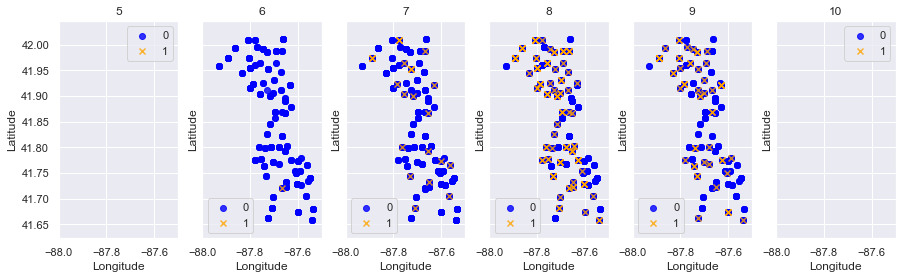

In [47]:
### By month, year 2013
### No trap in May and October in year 2013

months = sorted(list(set(train.month)))
fig,ax = plt.subplots(nrows=1,ncols=6, sharey=True)
fig.set_size_inches(15, 4)

i=0
for mth in months:
    
    no_wnv = train[(train['year'] == 2013) & (train['WnvPresent'] == 0) & (train['month'] == mth) ]
    yes_wnv = train[(train['year'] == 2013) & (train['WnvPresent'] == 1) & (train['month'] == mth) ]
    
    sns.regplot('Longitude', 'Latitude', data = no_wnv, fit_reg = False, ax = ax[i], color = 'blue', label = '0')
    sns.regplot('Longitude', 'Latitude', data = yes_wnv, fit_reg = False, 
                ax = ax[i], color = 'orange', marker = 'x', label='1')
    ax[i].set_title(mth)
    ax[i].set_xlim([-88, -87.5])
    ax[i].legend()
    
    i +=1

### Drop unwanted column

In [48]:
### train dataset

### drop location feature (keep only Longitude and Latitude), 
### drop 'NumMosquitos', which doesn't exist in test dataset

train_exclude = ['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 'NumMosquitos']
train_cleaned = train[[col for col in train.columns if col not in train_exclude]]


In [49]:
# test dataset
test_exclude = ['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy']
test_cleaned = test[[col for col in test.columns if col not in test_exclude]]


### Export cleaned data set to .csv file

In [50]:
train_cleaned.to_csv('../csv_files/train_clean.csv', index = False)
test_cleaned.to_csv('../csv_files/test_clean.csv', index = False)